# FAKE NEWS DETECTION 



---










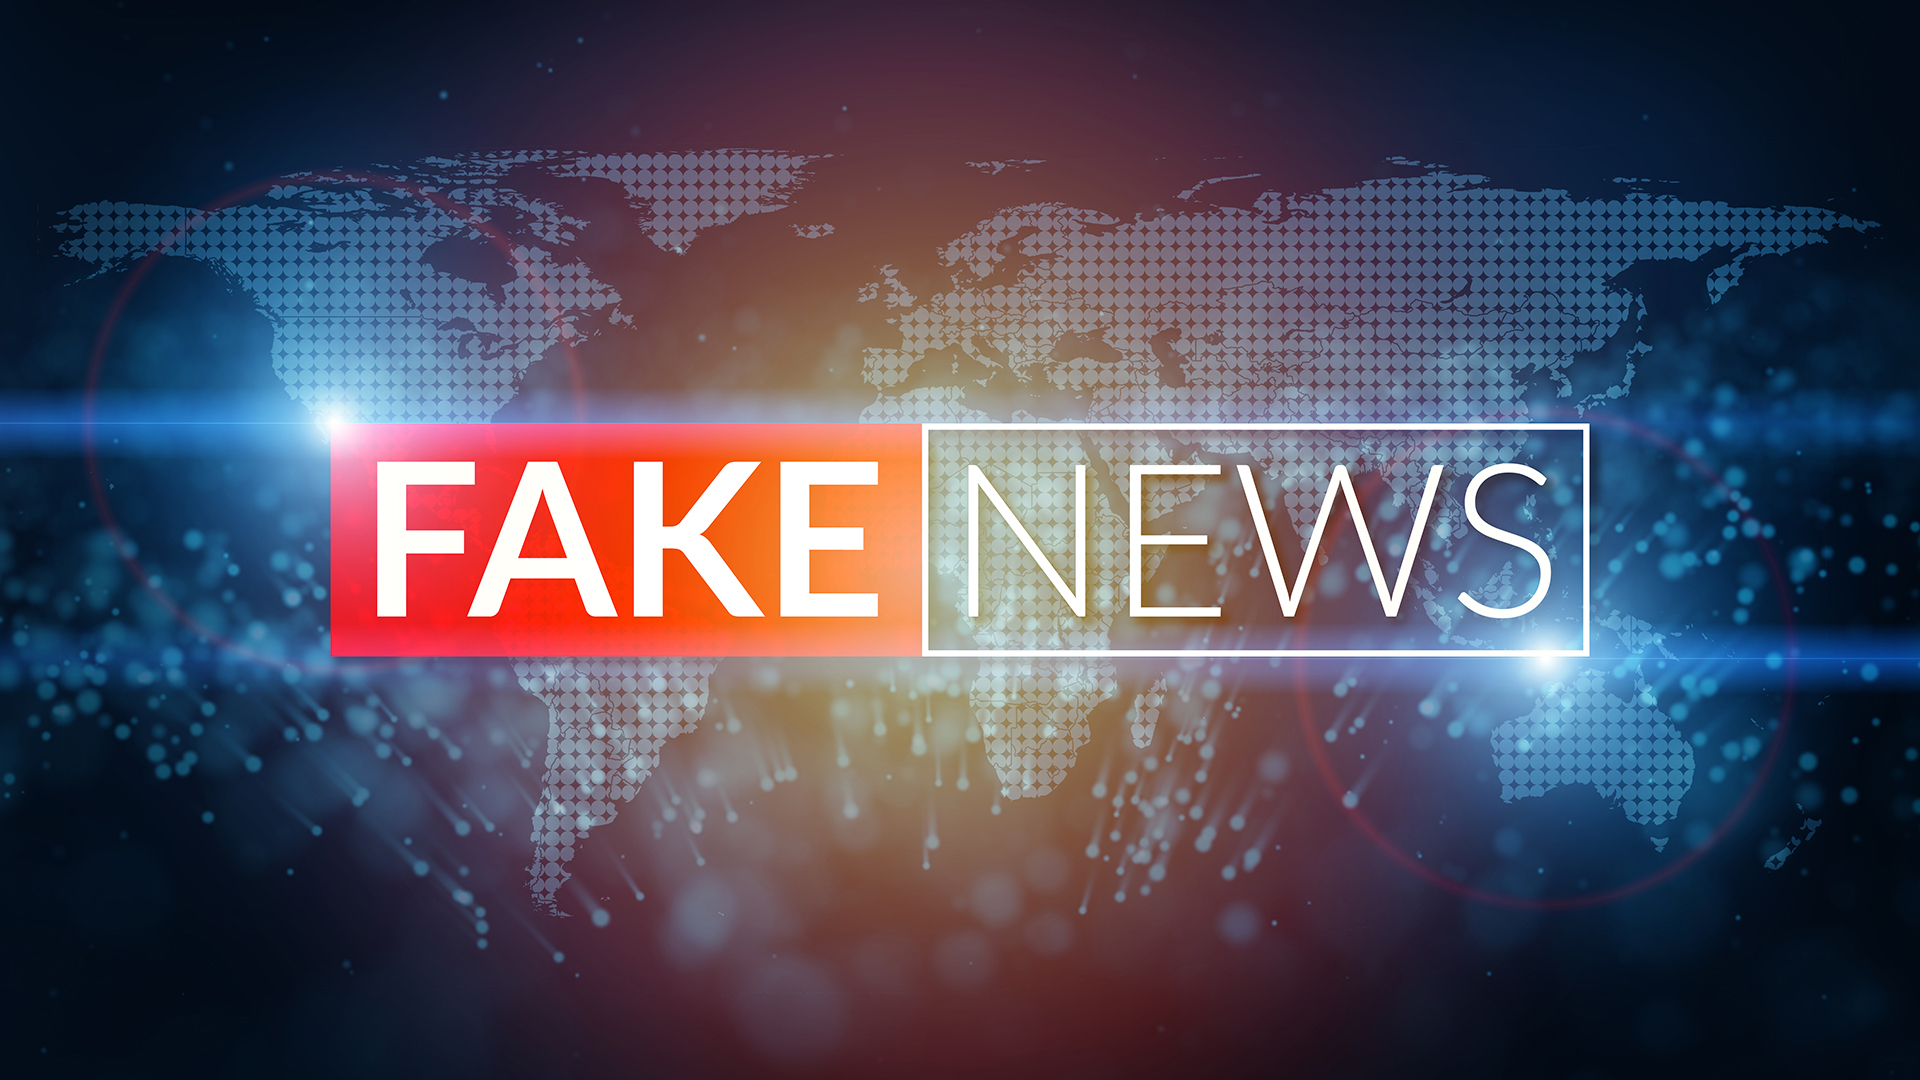


## Submitted by:

Deval Shah (xxxxxx807)

Neha Joseph (xxxxxx187)

Roshna babu (xxxxxx012)

Riyaben Gajjar (xxxxxx043)

Abraham Mathew (xxxxxx875)


Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Load the data

In [2]:

fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [3]:
real

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [4]:

fake

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [5]:
real.shape

(21417, 4)

In [6]:
fake.shape

(23481, 4)

In [7]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
fake.duplicated().sum()

3

In [12]:
real.duplicated().sum()

206

In [13]:
fake_1 = fake.drop_duplicates()
real_1 = real.drop_duplicates()

In [14]:
fake_1.duplicated().sum()

0

In [15]:
real_1.duplicated().sum()

0

In [16]:
#Adding category column
fake_1['Real'] = 0
real_1['Real'] = 1

<ipython-input-16-a6bf05e45dab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_1['Real'] = 0
<ipython-input-16-a6bf05e45dab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_1['Real'] = 1


Combining the datasets

In [17]:
#Combining real and fake
Data = pd.concat([fake_1, real_1], ignore_index=True, sort=False)
Data

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44684  'Fully committed' NATO backs new U.S. approach...   
44685  LexisNexis withdrew two products from Chinese ...   
44686  Minsk cultural hub becomes haven from authorities   
44687  Vatican upbeat on possibility of Pope Francis ...   
44688  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
44684  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44685  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44686  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44687  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44688  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date  Real  
0      December 31, 2017     0  
1      December 31, 2017     0  
2      December 30, 2017     0  
3      December 29, 2017     0  
4      December 25, 2017     0  
...                  ...   ...  
44684   August 22, 2017      1  
44685   August 22, 2017      1  
44686   August 22, 2017      1  
44687   August 22, 2017      1  
44688   August 22, 2017      1  

[44689 rows x 5 columns]

In [18]:
#Shuffle Dataset
from sklearn.utils import shuffle
Data = shuffle(Data)
Data = Data.reset_index(drop = True)
Data

title  \
0       Watch Trump’s Tense Confrontation With Protes...   
1      Erdogan says Turkey must clear Syria's Afrin o...   
2       Congress Sends Trump A SERIOUS Warning About ...   
3      U.S. Congress certifies Trump's Electoral Coll...   
4      Merkel wants initial coalition deal with SPD b...   
...                                                  ...   
44684  Iceland PM calls snap election after coalition...   
44685  WATCH FEMALE HISPANIC COP’S “ALL LIVES MATTER”...   
44686  BRICS countries deplore North Korean nuclear t...   
44687  NOT KIDDING! Serial Liar Brian Williams Blames...   
44688   Paul Manafort’s Daughters Say Their Father Is...   

                                                    text       subject  \
0      Turning up to a Trump rally to oppose the Repu...          News   
1      ANKARA (Reuters) - President Tayyip Erdogan sa...     worldnews   
2      Trump and his Twitter habit may be breaking fe...          News   
3      WASHINGTON (Reuters) - The U.S. Congress on Fr...  politicsNews   
4      BERLIN (Reuters) - German Chancellor Angela Me...     worldnews   
...                                                  ...           ...   
44684  REYKJAVIK (Reuters) - Iceland s prime minister...     worldnews   
44685  This brave cop (and mommy) reminds us that pol...      politics   
44686  XIAMEN, China (Reuters) - The nations of the B...     worldnews   
44687  The man suspended from his TV anchor job for f...      politics   
44688  Leaked text messages between the daughters of ...          News   

                      date  Real  
0        February 27, 2016     0  
1       November 17, 2017      1  
2           March 12, 2017     0  
3         January 6, 2017      1  
4       December 18, 2017      1  
...                    ...   ...  
44684  September 15, 2017      1  
44685          Sep 6, 2015     0  
44686   September 4, 2017      1  
44687          Dec 9, 2016     0  
44688         July 5, 2017     0  

[44689 rows x 5 columns]

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   Real     44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Data Insights

Real
0    23478
1    21211
Name: Real, dtype: int64


<AxesSubplot:title={'center':'Distribution of classes'}, xlabel='Real', ylabel='count'>

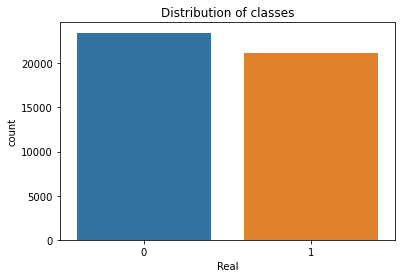

In [20]:
#Class distribution
import seaborn as sb
print(Data.groupby(['Real'])['Real'].count())
plt.title("Distribution of classes")
sb.countplot(x='Real', data=Data)

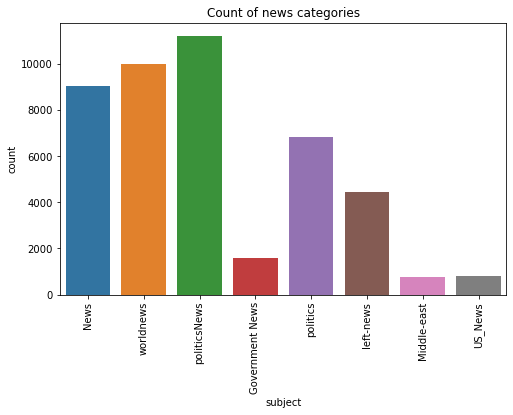

In [21]:
 #Split of data by subject
f = plt.figure()
plt.title("Count of news categories")
f.set_figwidth(8)
f.set_figheight(5)
plt.xticks(rotation = 90)
sb.countplot(x = "subject", data =  Data)
plt.show()

In [22]:
#World Cloud of important words in each category
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


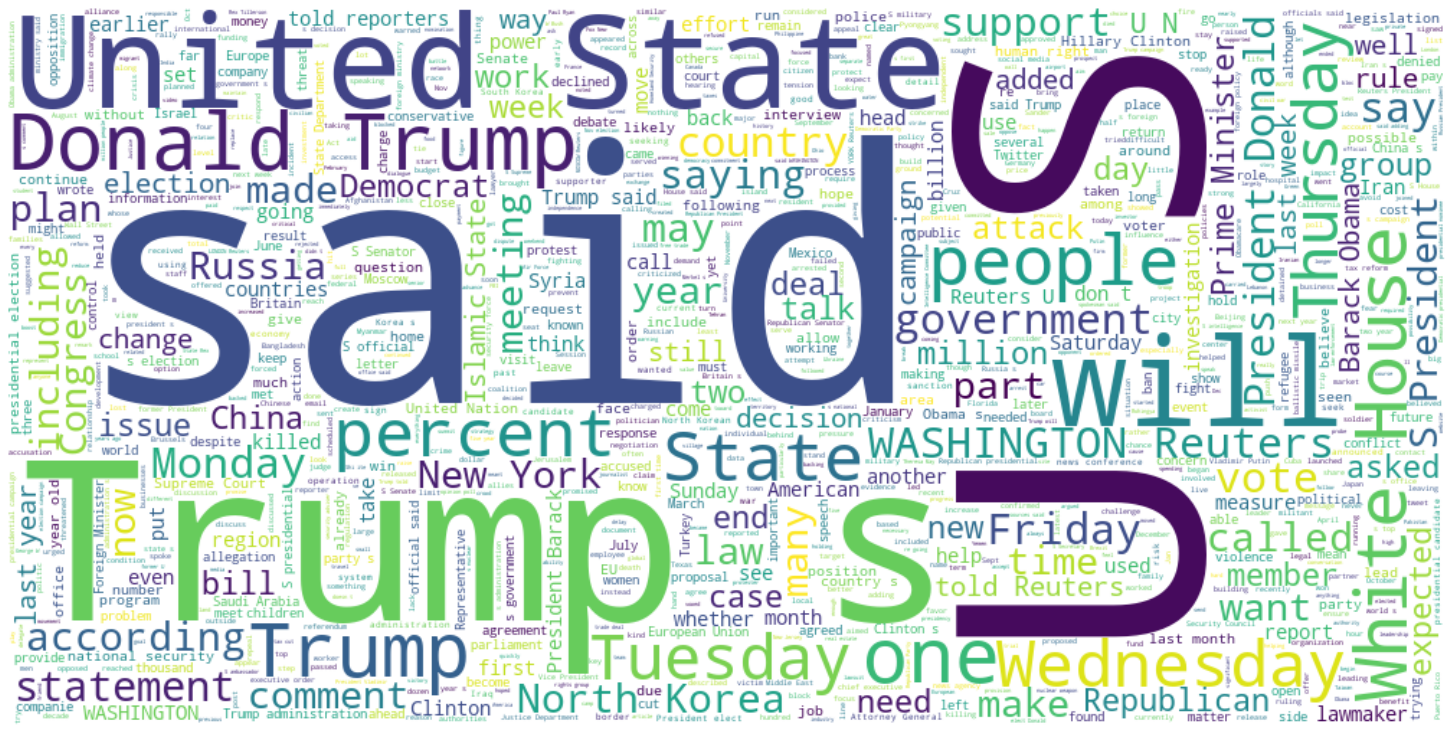

In [23]:
#Word cloud for real news
cloud = WordCloud(max_words = 1000, 
                  width = 1000, 
                  height = 500,
                  stopwords = STOPWORDS, 
                  background_color = "white").generate(" ".join(Data[Data['Real'] == 1].text))
plt.figure(figsize=(20, 15))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

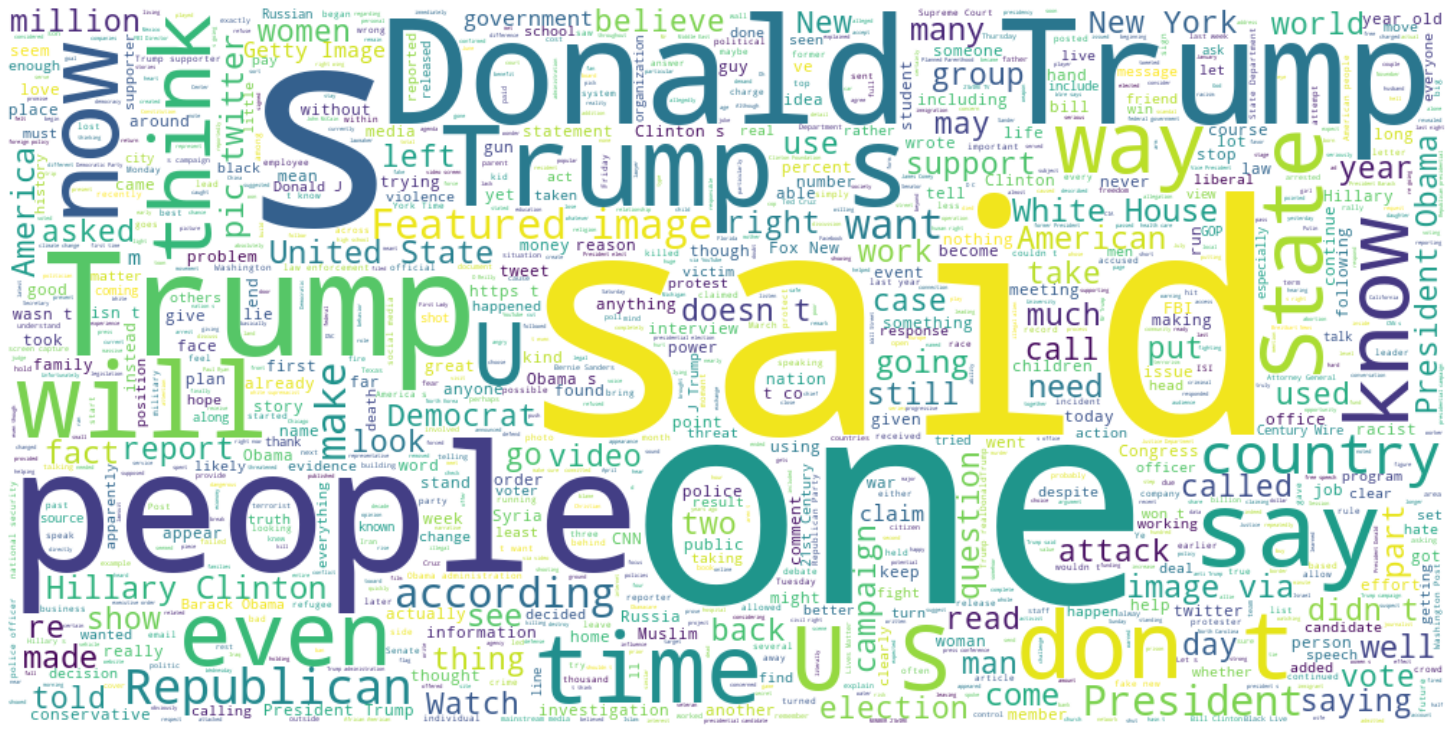

In [24]:
#Word cloud for fake news
cloud = WordCloud(max_words = 1000, 
                  width = 1000, 
                  height = 500,
                  stopwords = STOPWORDS, 
                  background_color = "white").generate(" ".join(Data[Data['Real'] == 0].text))
plt.figure(figsize=(20, 15))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Test train split

In [25]:
#Separate the label column
y = Data.Real
x = Data.text

In [27]:
#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.33,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29941,) (29941,)
(14748,) (14748,)


Vectorization

In [28]:
#Vectorizer for converting text to numeric values
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vevtorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vevtorizer.fit_transform(X_train)
tfidf_test = tfidf_vevtorizer.transform(X_test)

In [29]:
#Functon for Confusion Matrix

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Libraries for model building




In [30]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier

### Algorithm Selection

Naive Bayes

In [31]:

nbt_pipeline = Pipeline([
                  ('NBTV',tfidf_vevtorizer),
                  ('nb_clf',MultinomialNB())])
nbt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [32]:
#Model Metrcs
predict_nbt = nbt_pipeline.predict(X_test) 
score_nbt = metrics.accuracy_score(y_test,predict_nbt)
print(f'Testing Accuracy: {round(score_nbt*100,2)}%')

Testing Accuracy: 93.27%


In [33]:
#Model Metrcs
predict_nbt_tr = nbt_pipeline.predict(X_train) 
score_nbt_tr = metrics.accuracy_score(y_train,predict_nbt_tr)
print(f'Training Accuracy: {round(score_nbt_tr*100,2)}%')

Training Accuracy: 94.27%


Confusion matrix, without normalization


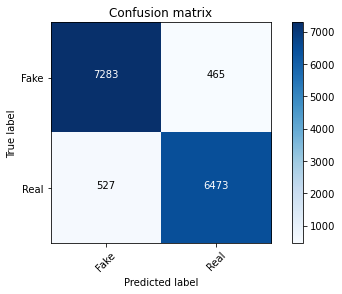

In [34]:
#Confusion Matrix for NBT (Testing)
cm = metrics.confusion_matrix(y_test, predict_nbt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
print(metrics.classification_report(y_test,predict_nbt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7748
           1       0.93      0.92      0.93      7000

    accuracy                           0.93     14748
   macro avg       0.93      0.93      0.93     14748
weighted avg       0.93      0.93      0.93     14748



PassiveAggressiveClassifier

In [36]:

pat_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
pat_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier(max_iter=50))])

In [37]:
predict_pat = pat_pipeline.predict(X_test) 
score_pat = metrics.accuracy_score(y_test,predict_pat)
print(f'Testing Accuracy: {round(score_pat*100,2)}%')

Testing Accuracy: 99.41%


In [38]:
predict_pat_tr = pat_pipeline.predict(X_train) 
score_pat_tr = metrics.accuracy_score(y_train,predict_pat_tr)
print(f'Training Accuracy: {round(score_pat_tr*100,2)}%')

Training Accuracy: 100.0%


Confusion matrix, without normalization


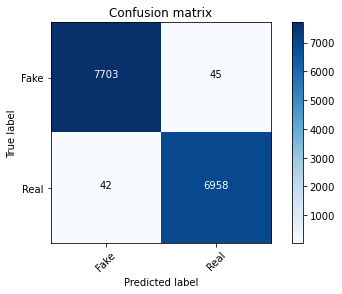

In [39]:
#Confusion Matrix for PAT
cm = metrics.confusion_matrix(y_test, predict_pat)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [40]:
print(metrics.classification_report(y_test,predict_pat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7748
           1       0.99      0.99      0.99      7000

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748



KNN Model

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

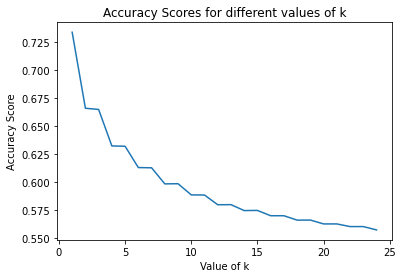

In [73]:
#Finding optimal number of neighbours for kNN model
k_range = list(range(1,25))
scores = []

for k in k_range:
    knn_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('knn_clf',KNeighborsClassifier(n_neighbors=k))])
    knn_pipeline.fit(X_train,y_train)
    y_pred = knn_pipeline.predict(X_test) 
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [42]:
knn_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('knn_clf',KNeighborsClassifier(n_neighbors=1))])
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('knn_clf', KNeighborsClassifier(n_neighbors=1))])

In [43]:
predict_knn = knn_pipeline.predict(X_test) 
score_knn = metrics.accuracy_score(y_test,predict_knn)
print(f'Testing Accuracy: {round(score_knn*100,2)}%')

Testing Accuracy: 73.37%


In [44]:
predict_knn_tr = knn_pipeline.predict(X_train) 
score_knn_tr = metrics.accuracy_score(y_train,predict_knn_tr)
print(f'Training Accuracy: {round(score_knn_tr*100,2)}%')

Training Accuracy: 100.0%


Confusion matrix, without normalization


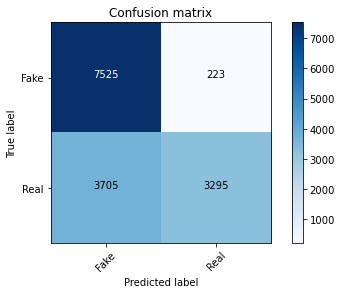

In [45]:
#Confusion Matrix for KNN
cm = metrics.confusion_matrix(y_test, predict_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [46]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79      7748
           1       0.94      0.47      0.63      7000

    accuracy                           0.73     14748
   macro avg       0.80      0.72      0.71     14748
weighted avg       0.80      0.73      0.71     14748



Decision Tree

In [47]:

from sklearn.tree import DecisionTreeClassifier
DT_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('DT_clf',DecisionTreeClassifier())])
DT_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('DT_clf', DecisionTreeClassifier())])

In [48]:
predict_DT = DT_pipeline.predict(X_test) 
score_DT = metrics.accuracy_score(y_test,predict_DT)
print(f' Testing Accuracy: {round(score_DT*100,2)}%')

 Testing Accuracy: 99.55%


In [49]:
predict_DT_tr = DT_pipeline.predict(X_train) 
score_DT_tr = metrics.accuracy_score(y_train,predict_DT_tr)
print(f' Training Accuracy: {round(score_DT_tr*100,2)}%')

 Training Accuracy: 100.0%


Confusion matrix, without normalization


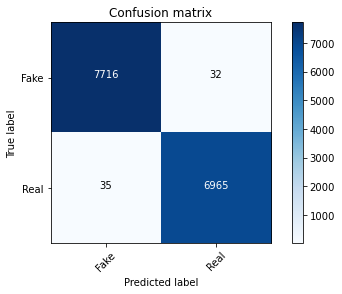

In [50]:
#Confusion Matrix for DT
cm = metrics.confusion_matrix(y_test, predict_DT)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [51]:
print(metrics.classification_report(y_test,predict_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7748
           1       1.00      0.99      1.00      7000

    accuracy                           1.00     14748
   macro avg       1.00      1.00      1.00     14748
weighted avg       1.00      1.00      1.00     14748



Logistic Regression

In [52]:

from sklearn.linear_model import LogisticRegression
LR_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('LR_clf',LogisticRegression(max_iter=10000, tol=0.1))])
LR_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('LR_clf', LogisticRegression(max_iter=10000, tol=0.1))])

In [53]:
predict_LR = LR_pipeline.predict(X_test) 
score_LR = metrics.accuracy_score(y_test,predict_LR)
print(f'Testing Accuracy: {round(score_LR*100,2)}%')

Testing Accuracy: 98.33%


In [54]:
predict_LR_tr = LR_pipeline.predict(X_train) 
score_LR_tr = metrics.accuracy_score(y_train,predict_LR_tr)
print(f'Training Accuracy: {round(score_LR_tr*100,2)}%')

Training Accuracy: 99.09%


Confusion matrix, without normalization


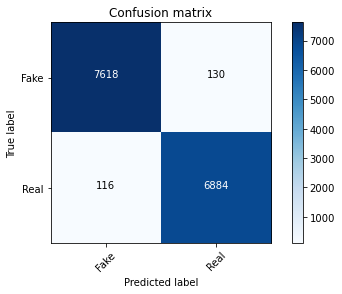

In [55]:
#Confusion Matrix for LR
cm = metrics.confusion_matrix(y_test, predict_LR)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [56]:
print(metrics.classification_report(y_test,predict_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7748
           1       0.98      0.98      0.98      7000

    accuracy                           0.98     14748
   macro avg       0.98      0.98      0.98     14748
weighted avg       0.98      0.98      0.98     14748



Random Forest

In [57]:

from sklearn.ensemble import RandomForestClassifier
RFC_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('classifier', RandomForestClassifier(random_state = 42))])
RFC_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [58]:
predict_RFC = RFC_pipeline.predict(X_test) 
score_RFC = metrics.accuracy_score(y_test,predict_RFC)
print(f'Testing Accuracy: {round(score_RFC*100,2)}%')

Testing Accuracy: 98.83%


In [59]:
predict_RFC_tr = RFC_pipeline.predict(X_train) 
score_RFC_tr = metrics.accuracy_score(y_train,predict_RFC_tr)
print(f'Training Accuracy: {round(score_RFC_tr*100,2)}%')

Training Accuracy: 100.0%


Confusion matrix, without normalization


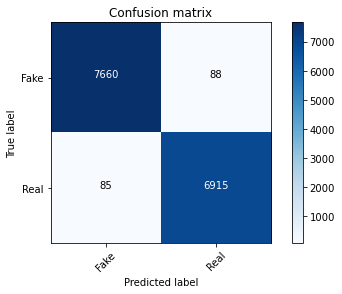

In [60]:
#Confusion Matrix for RFC
cm = metrics.confusion_matrix(y_test, predict_RFC)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [61]:
print(metrics.classification_report(y_test,predict_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7748
           1       0.99      0.99      0.99      7000

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748



Combining accuracy from all models

In [62]:

Accuracy_scores = pd.DataFrame([{'Model':'Naive Bayes', 'Testing Accuracy':score_nbt*100, 'Training Accuracy':score_nbt_tr*100}, 
                                {'Model':'Passive Aggressive', 'Testing Accuracy':score_pat*100, 'Training Accuracy':score_pat_tr*100}, 
                                {'Model':'KNN', 'Testing Accuracy':score_knn*100, 'Training Accuracy':score_knn_tr*100}, 
                                {'Model':'Logistic Regression', 'Testing Accuracy':score_LR*100, 'Training Accuracy':score_LR_tr*100}, 
                                {'Model':'Decision Tree', 'Testing Accuracy':score_DT*100, 'Training Accuracy':score_DT_tr*100}, 
                                {'Model':'Random Forest', 'Testing Accuracy':score_RFC*100, 'Training Accuracy':score_RFC_tr*100}])
Accuracy_scores

Model  Testing Accuracy  Training Accuracy
0          Naive Bayes         93.273664          94.265389
1   Passive Aggressive         99.410090          99.996660
2                  KNN         73.365880          99.996660
3  Logistic Regression         98.331977          99.091547
4        Decision Tree         99.545701          99.996660
5        Random Forest         98.826960          99.996660

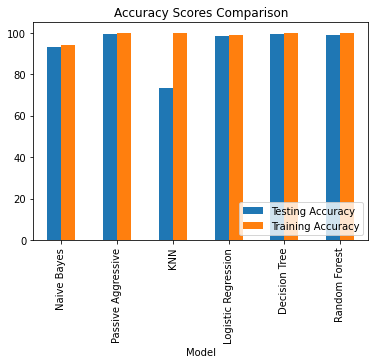

In [63]:
# plot grouped bar chart
Accuracy_scores.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Accuracy Scores Comparison').legend(loc='lower right')

In [64]:
#Testing randomm news for Decision Tree
#Saving final model
import pickle
model_file = 'final_model.sav'
pickle.dump(DT_pipeline,open(model_file,'wb'))

Live Demo

In [65]:
#Function to predict the news
def news_prediction(var):
    load_model = pickle.load(open('final_model.sav','rb'))
    pred = load_model.predict([var])
    
    return(print(pred[0]))

In [66]:
news_prediction(x[100])

0


In [67]:
y[100]

0

In [68]:
y[10005]

1

In [75]:
news_prediction('WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: â€œAs mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.â€ Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal â€œgreat news.â€ â€œIâ€™m hoping it means the government has come to see that there is no way to justify a ban and that itâ€™s not good for the military or our country,â€ Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamaâ€™s policy of accepting them. Trump said on Twitter at the time that the military â€œcannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.â€ Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumpâ€™s ban while legal challenges to the Republican presidentâ€™s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicantsâ€™ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept â€œsome individuals who are not medically fit for service.â€ The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidentâ€™s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity. ')

1


In [70]:
news_prediction('On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the following message in the event of an internal server error: https://t.co/zrWpyMXRcz pic.twitter.com/wiQSQNNzw0  Christopher Ingraham (@_cingraham) December 28, 2017That snippet of code appears to be on all https://t.co/dkhw0AlHB4 pages, which the footer says is paid for by the RNC? pic.twitter.com/oaZDT126B3  Christopher Ingraham (@_cingraham) December 28, 2017It s also all over https://t.co/ayBlGmk65Z. As others have noted in this thread, this is weird code and it s not clear it would ever actually display, but who knows.  Christopher Ingraham (@_cingraham) December 28, 2017After the coding was called out, the reference to Obama was deleted.UPDATE: The golf error message has been removed from the Trump and GOP websites. They also fixed the javascript  =  vs  ==  problem. Still not clear when these messages would actually display, since the actual 404 (and presumably 500) page displays a different message pic.twitter.com/Z7dmyQ5smy  Christopher Ingraham (@_cingraham) December 29, 2017That suggests someone at either RNC or the Trump admin is sensitive enough to Trump s golf problem to make this issue go away quickly once people noticed. You have no idea how much I d love to see the email exchange that led us here.  Christopher Ingraham (@_cingraham) December 29, 2017 The code was f-cked up.The best part about this is that they are using the  =  (assignment) operator which means that bit of code will never get run. If you look a few lines up  errorCode  will always be  404          (@tw1trsux) December 28, 2017trump s coders can t code. Nobody is surprised.  Tim Peterson (@timrpeterson) December 28, 2017Donald Trump is obsessed with Obama that his name was even in the coding of his website while he played golf again.Photo by Joe Raedle/Getty Images.')

0


In [71]:
news_prediction(x[528])

0


In [72]:
y[528]

0